<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Best_Streaming_Service_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [2]:
tv_shows.drop_duplicates(subset='Title',
                         keep='first',inplace=True)

In [7]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')
# Convert the 'Rotten Tomatoes' column to string type explicitly
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].astype(str)
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].str.rstrip('%')
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(lambda x: pd.to_numeric(x.split('/')[0]) if '/' in x else pd.to_numeric(x))
#The line above handles values formatted like "100/100" by splitting on '/' and selecting the first element (numerator).
#If a '/' is not found, it assumes the original format and applies pd.to_numeric directly.

tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
# Instead of multiplying by 10, extract numeric part if the string is not numeric
tv_shows['IMDb'] = tv_shows['IMDb'].apply(lambda x: float(x.split('/')[0]) if isinstance(x,str) and '/' in x  else x)
# Multiply by 10
tv_shows['IMDb'] = tv_shows['IMDb'] * 10
tv_shows['IMDb'] = tv_shows['IMDb'].astype('int')

In [8]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [11]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')
tv_shows_combined.drop(columns = ['Unnamed: 0','Netflix','Hulu', 'Prime Video', 'Disney+'], inplace=True)

<Axes: xlabel='StreamingOn'>

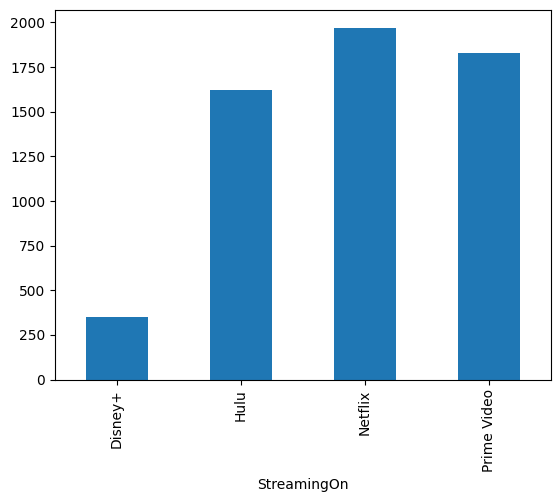

In [12]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [13]:
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [14]:
px.scatter(tv_shows_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')